<a href="https://colab.research.google.com/github/ConorMulholland/FinalYearProject/blob/main/FinalYearProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv("Team Stats Per Game.csv")

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df

,season,lg,team,abbreviation,playoffs,g,mp_per_game,fg_per_game,fga_per_game,fg_percent,...,ft_percent,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game
0,2022,NBA,Atlanta Hawks,ATL,False,60.0,240.0,41.2,87.9,0.468,...,0.804,9.9,34.5,44.4,24.4,6.9,4.4,12.3,18.5,112.4
1,2022,NBA,Boston Celtics,BOS,False,63.0,243.2,39.8,87.5,0.455,...,0.814,10.7,35.7,46.4,23.8,7.2,6.0,14.0,18.6,109.2
2,2022,NBA,Brooklyn Nets,BRK,False,62.0,240.8,41.3,88.8,0.465,...,0.803,10.3,34.3,44.6,24.8,7.0,5.3,13.8,19.9,110.7
3,2022,NBA,Chicago Bulls,CHI,False,62.0,240.4,42.0,87.1,0.482,...,0.814,8.8,34.5,43.2,24.2,7.1,4.5,13.0,18.7,112.4
4,2022,NBA,Charlotte Hornets,CHO,False,63.0,243.2,42.2,92.3,0.458,...,0.732,11.1,34.1,45.2,27.2,8.7,4.9,13.4,20.1,114.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1778,1947,BAA,Providence Steamrollers,PRO,False,60.0,NaN,27.2,93.0,0.292,...,0.655,NaN,NaN,NaN,8.0,NaN,NaN,NaN,20.3,72.5
1779,1947,BAA,St. Louis Bombers,STB,True,61.0,NaN,26.2,96.3,0.272,...,0.616,NaN,NaN,NaN,4.8,NaN,NaN,NaN,20.2,66.6
1780,1947,BAA,Toronto Huskies,TRH,False,60.0,NaN,25.3,94.5,0.267,...,0.622,NaN,NaN,NaN,7.7,NaN,NaN,NaN,21.2,66.6
1781,1947,BAA,Washington Capitols,WSC,True,60.0,NaN,28.7,96.6,0.297,...,0.706,NaN,NaN,NaN,6.3,NaN,NaN,NaN,19.1,73.8


In [ ]:
df = df.iloc[:1237]
df
#Removing all years before 1980 as there was no three point line

,season,lg,team,abbreviation,playoffs,g,mp_per_game,fg_per_game,fga_per_game,fg_percent,...,ft_percent,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game
0,2022,NBA,Atlanta Hawks,ATL,False,60.0,240.0,41.2,87.9,0.468,...,0.804,9.9,34.5,44.4,24.4,6.9,4.4,12.3,18.5,112.4
1,2022,NBA,Boston Celtics,BOS,False,63.0,243.2,39.8,87.5,0.455,...,0.814,10.7,35.7,46.4,23.8,7.2,6.0,14.0,18.6,109.2
2,2022,NBA,Brooklyn Nets,BRK,False,62.0,240.8,41.3,88.8,0.465,...,0.803,10.3,34.3,44.6,24.8,7.0,5.3,13.8,19.9,110.7
3,2022,NBA,Chicago Bulls,CHI,False,62.0,240.4,42.0,87.1,0.482,...,0.814,8.8,34.5,43.2,24.2,7.1,4.5,13.0,18.7,112.4
4,2022,NBA,Charlotte Hornets,CHO,False,63.0,243.2,42.2,92.3,0.458,...,0.732,11.1,34.1,45.2,27.2,8.7,4.9,13.4,20.1,114.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1232,1980,NBA,San Diego Clippers,SDC,False,82.0,240.9,43.0,91.4,0.470,...,0.736,15.8,28.1,43.9,20.6,8.1,3.5,17.6,23.1,107.6
1233,1980,NBA,Seattle SuperSonics,SEA,True,82.0,241.8,43.3,92.3,0.470,...,0.768,16.8,31.1,47.9,24.9,9.1,5.2,18.2,22.7,108.5
1234,1980,NBA,Utah Jazz,UTA,False,82.0,241.5,41.2,83.1,0.496,...,0.809,11.8,28.8,40.6,24.5,8.0,4.4,18.8,24.5,102.4
1235,1980,NBA,Washington Bullets,WSB,True,82.0,242.4,43.6,95.1,0.458,...,0.758,16.3,33.2,49.5,26.8,6.5,5.4,16.8,23.1,107.0


In [ ]:
df.drop(df[(df['team'] == "League Average")].index, inplace=True)
#Removing League average from table

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df

,season,lg,team,abbreviation,playoffs,g,mp_per_game,fg_per_game,fga_per_game,fg_percent,...,ft_percent,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game
0,2022,NBA,Atlanta Hawks,ATL,False,60.0,240.0,41.2,87.9,0.468,...,0.804,9.9,34.5,44.4,24.4,6.9,4.4,12.3,18.5,112.4
1,2022,NBA,Boston Celtics,BOS,False,63.0,243.2,39.8,87.5,0.455,...,0.814,10.7,35.7,46.4,23.8,7.2,6.0,14.0,18.6,109.2
2,2022,NBA,Brooklyn Nets,BRK,False,62.0,240.8,41.3,88.8,0.465,...,0.803,10.3,34.3,44.6,24.8,7.0,5.3,13.8,19.9,110.7
3,2022,NBA,Chicago Bulls,CHI,False,62.0,240.4,42.0,87.1,0.482,...,0.814,8.8,34.5,43.2,24.2,7.1,4.5,13.0,18.7,112.4
4,2022,NBA,Charlotte Hornets,CHO,False,63.0,243.2,42.2,92.3,0.458,...,0.732,11.1,34.1,45.2,27.2,8.7,4.9,13.4,20.1,114.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231,1980,NBA,San Antonio Spurs,SAS,True,82.0,240.9,47.0,94.4,0.498,...,0.801,14.1,30.7,44.7,28.4,9.4,4.1,19.4,25.6,119.4
1232,1980,NBA,San Diego Clippers,SDC,False,82.0,240.9,43.0,91.4,0.470,...,0.736,15.8,28.1,43.9,20.6,8.1,3.5,17.6,23.1,107.6
1233,1980,NBA,Seattle SuperSonics,SEA,True,82.0,241.8,43.3,92.3,0.470,...,0.768,16.8,31.1,47.9,24.9,9.1,5.2,18.2,22.7,108.5
1234,1980,NBA,Utah Jazz,UTA,False,82.0,241.5,41.2,83.1,0.496,...,0.809,11.8,28.8,40.6,24.5,8.0,4.4,18.8,24.5,102.4


In [ ]:
df.isnull().values.any()
#checking for any NaN values

False

**Variation**

In [ ]:
df.groupby('team')['playoffs'].sum()

team
Atlanta Hawks                        27
Boston Celtics                       32
Brooklyn Nets                         6
Charlotte Bobcats                     2
Charlotte Hornets                     8
Chicago Bulls                        26
Cleveland Cavaliers                  19
Dallas Mavericks                     23
Denver Nuggets                       24
Detroit Pistons                      23
Golden State Warriors                13
Houston Rockets                      30
Indiana Pacers                       27
Kansas City Kings                     3
Los Angeles Clippers                 13
Los Angeles Lakers                   34
Memphis Grizzlies                    11
Miami Heat                           22
Milwaukee Bucks                      26
Minnesota Timberwolves                9
New Jersey Nets                      15
New Orleans Hornets                   5
New Orleans Pelicans                  2
New Orleans/Oklahoma City Hornets     0
New York Knicks                    

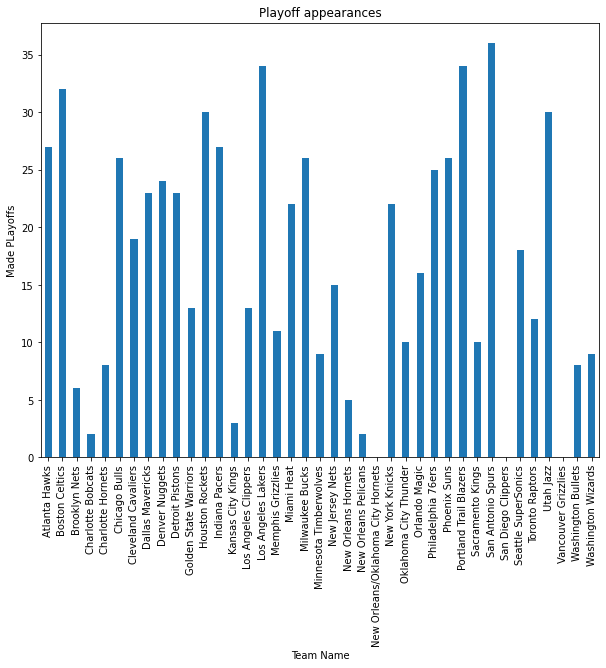

In [ ]:
df.groupby('team')['playoffs'].sum().plot(kind='bar', title='Playoff appearances', ylabel='Made PLayoffs',xlabel='Team Name', figsize=(10, 8))

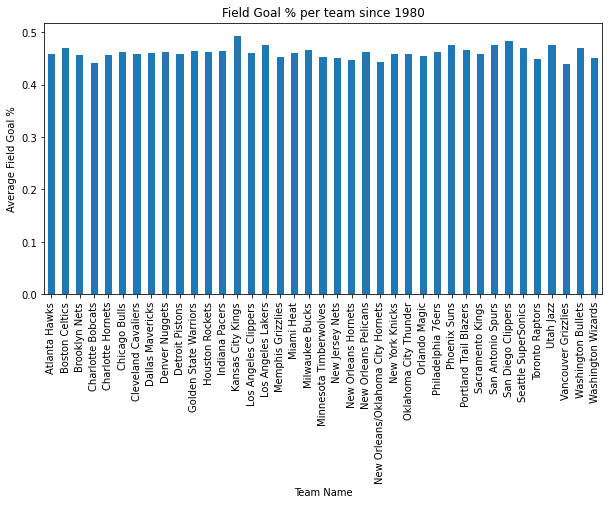

In [ ]:
df.groupby('team')['fg_percent'].mean().plot(kind='bar', title='Field Goal % per team since 1980', ylabel='Average Field Goal %',xlabel='Team Name', figsize=(10, 5))

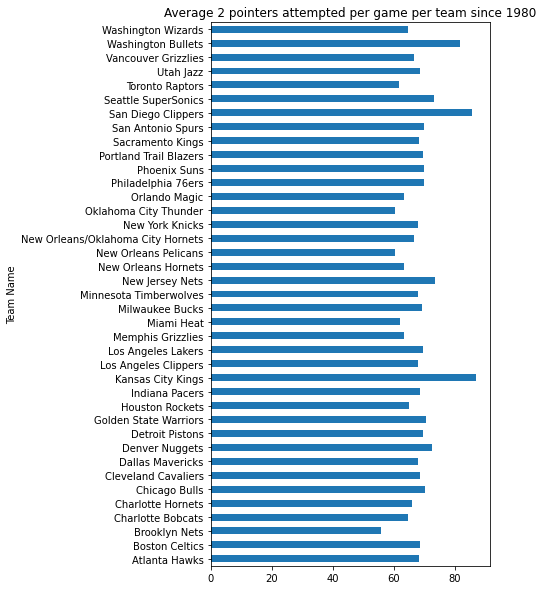

In [ ]:
df.groupby('team')['x2pa_per_game'].mean().plot(kind='barh', title='Average 2 pointers attempted per game per team since 1980', ylabel='Average 2 point attempts',xlabel='Team Name',sort_columns='true', figsize=(5, 10))

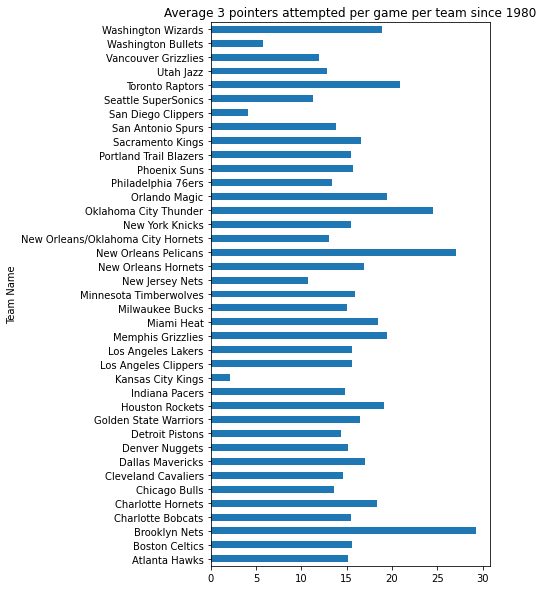

In [ ]:
df.groupby('team')['x3pa_per_game'].mean().plot(kind='barh', title='Average 3 pointers attempted per game per team since 1980', ylabel='Average 3 point attempts',xlabel='Team Name',sort_columns='true', figsize=(5, 10))

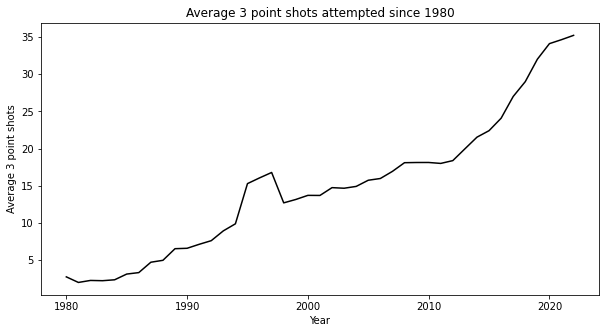

In [ ]:
ax = df.groupby('season')['x3pa_per_game'].mean().plot(kind='line', color = 'black',title='Average 3 point shots attempted since 1980', ylabel='Average 3 point shots',xlabel='Year',sort_columns='true', figsize=(10, 5))


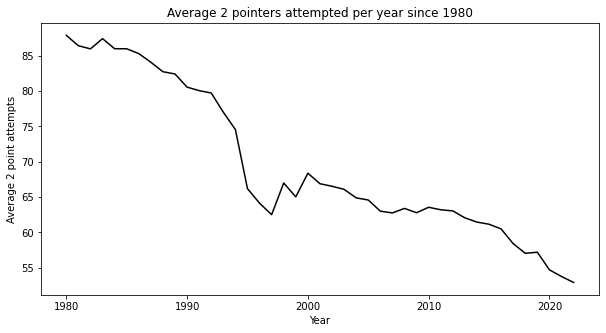

In [ ]:
df.groupby('season')['x2pa_per_game'].mean().plot(kind='line', color = 'black' ,title='Average 2 pointers attempted per year since 1980', ylabel='Average 2 point attempts',xlabel='Year',sort_columns='true', figsize=(10,5))

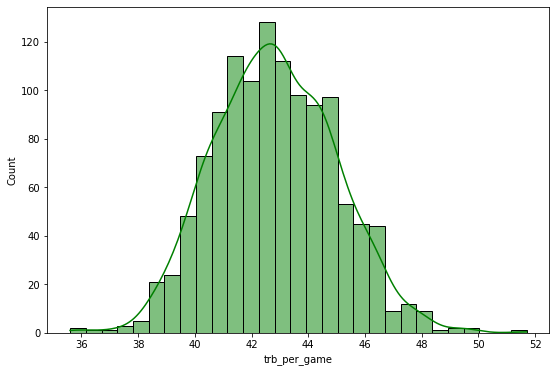

In [ ]:
f, ax = plt.subplots(figsize=(9, 6))
sns.histplot(data=df, x="trb_per_game",kde=True, color = 'green')

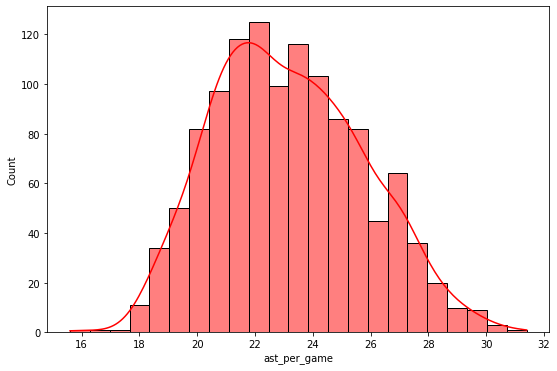

In [ ]:
f, ax = plt.subplots(figsize=(9, 6))
sns.histplot(data=df, x="ast_per_game",kde=True, color = "red")

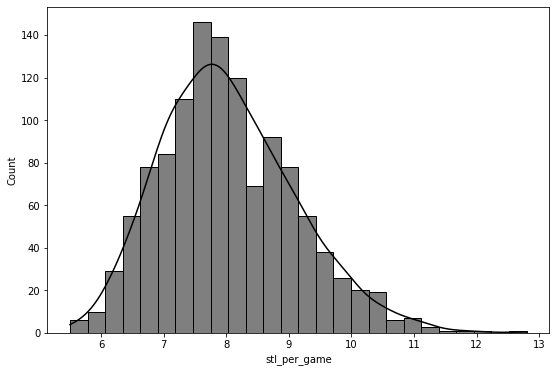

In [ ]:
f, ax = plt.subplots(figsize=(9, 6))
sns.histplot(data=df, x="stl_per_game",kde=True, color = 'black')

**Covariation**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

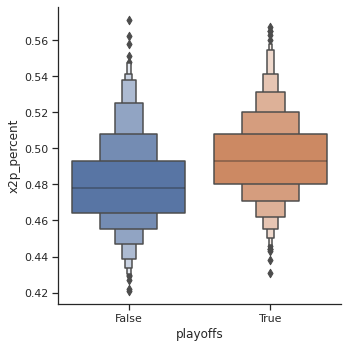

In [ ]:
sns.catplot(x="playoffs", y="x2p_percent",kind = "boxen", data=df.sort_values('playoffs'))

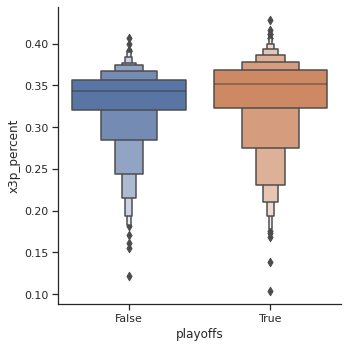

In [ ]:
sns.catplot(x="playoffs", y="x3p_percent",kind = "boxen", data=df.sort_values('playoffs'))

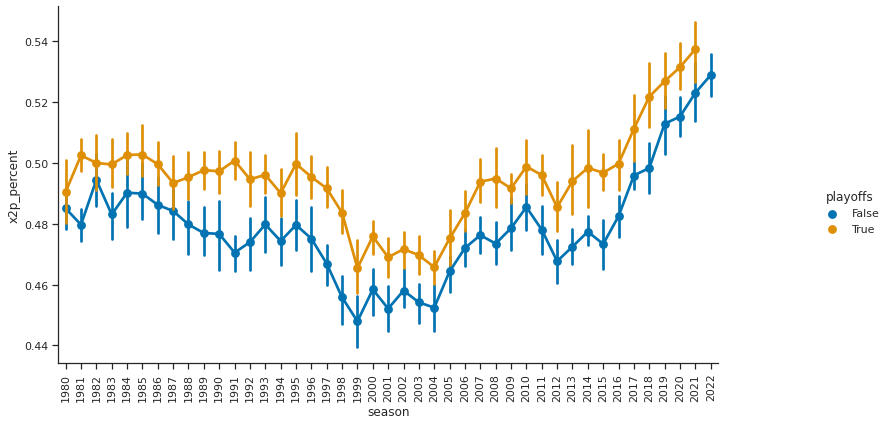

In [ ]:
ax = sns.catplot(x="season", y="x2p_percent", hue="playoffs", kind="point", data=df, palette = 'colorblind')
ax.set_xticklabels(rotation=90)
ax.fig.set_figwidth(14)
ax.fig.set_figheight(6)

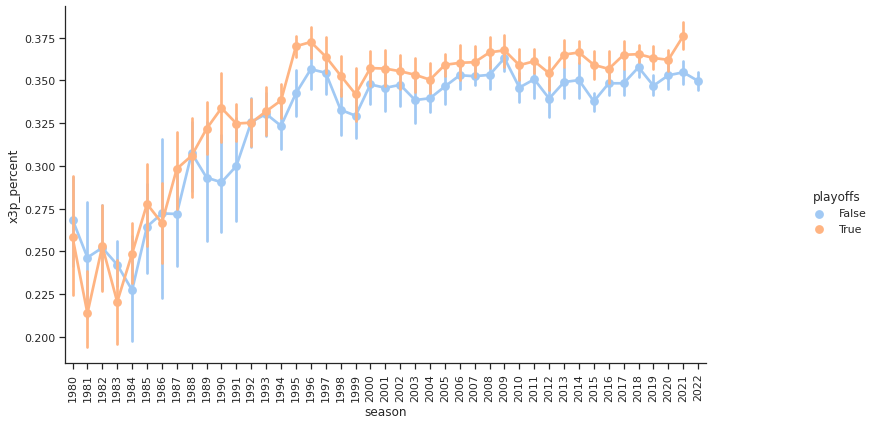

In [ ]:
ax = sns.catplot(x="season", y="x3p_percent", hue="playoffs", kind="point", data=df, palette = 'pastel')
ax.set_xticklabels(rotation = 90)
ax.fig.set_figwidth(14)
ax.fig.set_figheight(6)

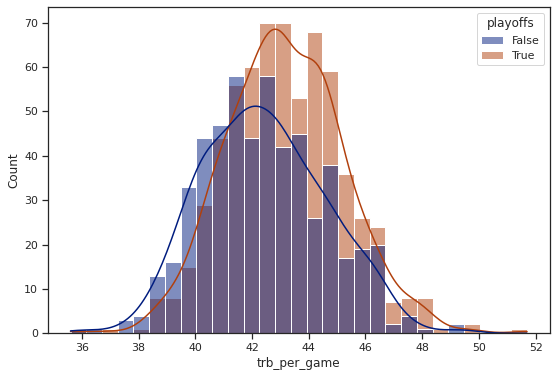

In [ ]:
f, ax = plt.subplots(figsize=(9, 6))
sns.histplot(data=df, x="trb_per_game",kde=True,hue="playoffs", palette = 'dark')

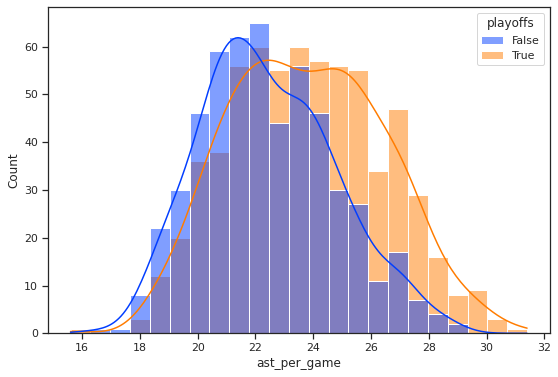

In [ ]:
f, ax = plt.subplots(figsize=(9, 6))
sns.histplot(data=df, x="ast_per_game",kde=True,hue = "playoffs", palette = 'bright')

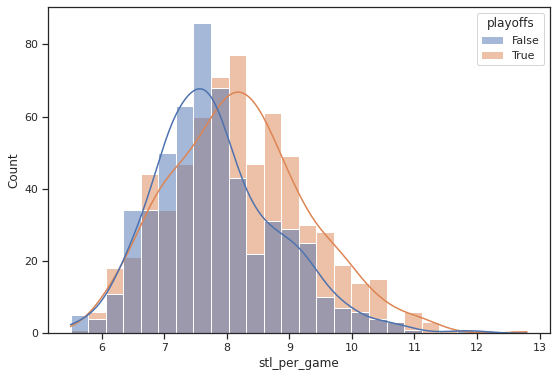

In [ ]:
f, ax = plt.subplots(figsize=(9, 6))
sns.histplot(data=df, x="stl_per_game",kde=True,hue = "playoffs")

**Logistic Regression**

In [ ]:
target = df.copy()
target = target[['playoffs']]
target
#creating target dataframe

,playoffs
0,False
1,False
2,False
3,False
4,False
...,...
1231,True
1232,False
1233,True
1234,False


In [ ]:
target["playoffs"] = target["playoffs"].astype(int)

In [ ]:
df = df.drop(['season','lg','team','abbreviation'], axis=1)
#removing columns containing non numerical values

In [ ]:
X = df.iloc[:,df.columns != 'playoffs']
y = df.playoffs

In [ ]:
model = LogisticRegression()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.20, random_state=5, stratify=y)

In [ ]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [ ]:
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("f1:",metrics.f1_score(y_test,y_pred))

Accuracy: 0.8158995815899581
Precision: 0.8372093023255814
Recall: 0.8244274809160306
f1: 0.8307692307692307


**Correlation matrix / Feature Selection**

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [ ]:
X = df.drop("playoffs",1)   #Feature Matrix
y = df["playoffs"]          #Target Variable
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,playoffs,g,mp_per_game,fg_per_game,fga_per_game,fg_percent,x3p_per_game,x3pa_per_game,x3p_percent,x2p_per_game,...,ft_percent,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game
0,False,60.0,240.0,41.2,87.9,0.468,12.6,33.4,0.377,28.6,...,0.804,9.9,34.5,44.4,24.4,6.9,4.4,12.3,18.5,112.4
1,False,63.0,243.2,39.8,87.5,0.455,12.6,36.6,0.344,27.2,...,0.814,10.7,35.7,46.4,23.8,7.2,6.0,14.0,18.6,109.2
2,False,62.0,240.8,41.3,88.8,0.465,11.2,32.0,0.349,30.1,...,0.803,10.3,34.3,44.6,24.8,7.0,5.3,13.8,19.9,110.7
3,False,62.0,240.4,42.0,87.1,0.482,11.1,29.6,0.374,30.9,...,0.814,8.8,34.5,43.2,24.2,7.1,4.5,13.0,18.7,112.4
4,False,63.0,243.2,42.2,92.3,0.458,13.7,38.3,0.357,28.5,...,0.732,11.1,34.1,45.2,27.2,8.7,4.9,13.4,20.1,114.1


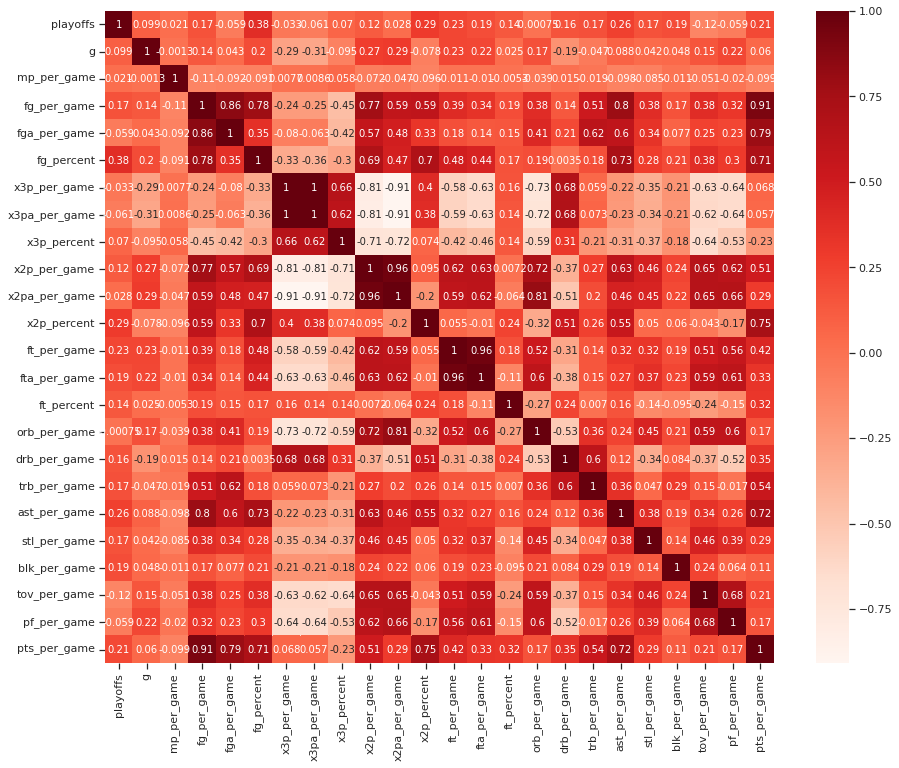

In [ ]:
plt.figure(figsize=(15,12))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
#Correlation with output variable
cor_target = abs(cor["playoffs"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.15]
relevant_features = relevant_features.drop('playoffs')
relevant_features.sort

fg_per_game     0.167859
fg_percent      0.378517
x2p_percent     0.290557
ft_per_game     0.225385
fta_per_game    0.188529
drb_per_game    0.159430
trb_per_game    0.174859
ast_per_game    0.259495
stl_per_game    0.170955
blk_per_game    0.191494
pts_per_game    0.214470
Name: playoffs, dtype: float64

In [ ]:
features = ['fg_per_game','fg_percent','x2p_percent','ft_per_game','fta_per_game','drb_per_game','trb_per_game','ast_per_game','stl_per_game','blk_per_game','pts_per_game',]

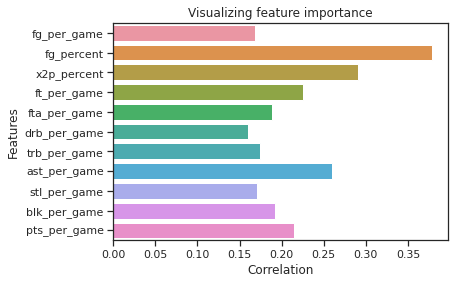

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.barplot(x=relevant_features, y=features)
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.title("Visualizing feature importance")
plt.show()

**Decision** **tree**

In [ ]:
import pandas
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

In [ ]:
NewDF = df[df.columns.intersection(features)]
NewDF.head()

,fg_per_game,fg_percent,x2p_percent,ft_per_game,fta_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,pts_per_game
0,41.2,0.468,0.525,17.5,21.8,34.5,44.4,24.4,6.9,4.4,112.4
1,39.8,0.455,0.534,17.1,21.0,35.7,46.4,23.8,7.2,6.0,109.2
2,41.3,0.465,0.530,17.0,21.2,34.3,44.6,24.8,7.0,5.3,110.7
3,42.0,0.482,0.538,17.3,21.3,34.5,43.2,24.2,7.1,4.5,112.4
4,42.2,0.458,0.529,15.9,21.7,34.1,45.2,27.2,8.7,4.9,114.1


In [ ]:
X = NewDF
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.20, random_state=5, stratify=y)

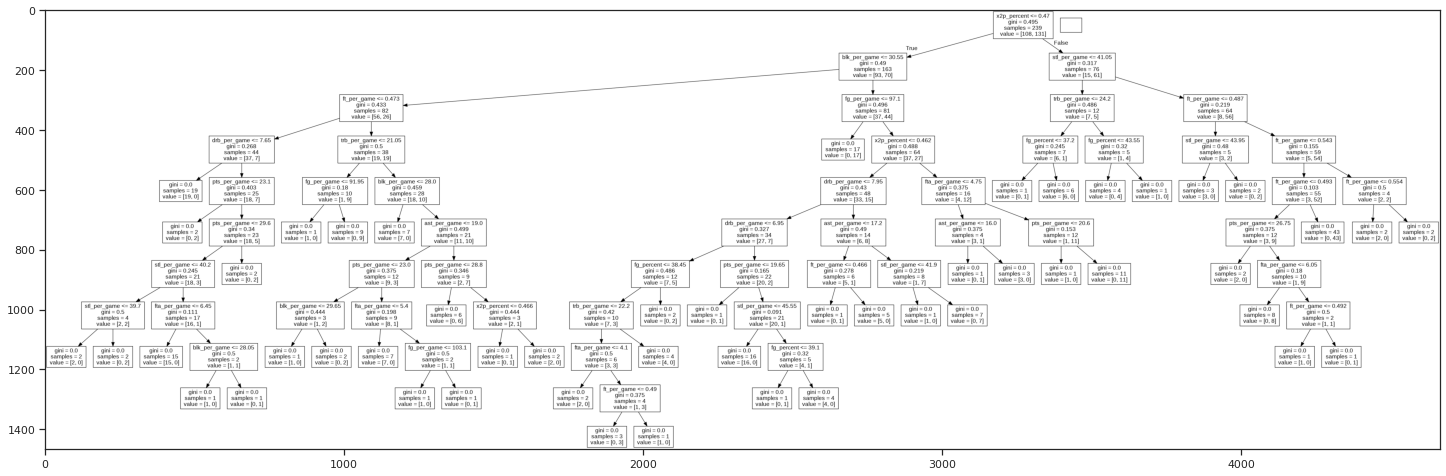

In [ ]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_test, y_test)
data = tree.export_graphviz(dtree, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')

img=pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.gcf().set_size_inches(25, 20)
plt.show()

In [ ]:
res_pred = dtree.predict(X_train)
score = accuracy_score(y_train, res_pred)
print('Accuracy:', score)
print("Precision:",metrics.precision_score(y_train, res_pred))
print("Recall:",metrics.recall_score(y_train, res_pred))
print("f1:",metrics.f1_score(y_train,res_pred))


Accuracy: 0.6492146596858639
Precision: 0.6621160409556314
Recall: 0.7390476190476191
f1: 0.6984698469846985


**Support vector Machines (SVM)**

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("f1:",metrics.f1_score(y_test,y_pred))


Accuracy: 0.6527196652719666
Precision: 0.6875
Recall: 0.6717557251908397
f1: 0.6795366795366795


In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto")
svm_clf.fit(X_train, y_train)

SVC(gamma='auto')

In [ ]:
y_pred = svm_clf.predict(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score

svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=10)
svm_scores.mean()

0.6691008771929824

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train,y_train)
y_pred= forest_clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("f1:",metrics.f1_score(y_test,y_pred))

Accuracy: 0.694560669456067
Precision: 0.7230769230769231
Recall: 0.7175572519083969
f1: 0.7203065134099618


**Artificial Neural Network (Ann)**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
X = NewDF
Y = df["playoffs"] 

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=5)

In [ ]:
#Performing Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Initialising ANN
ann = tf.keras.models.Sequential()

In [ ]:
#Adding First Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [ ]:
 #Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [ ]:
#Adding Output Layer
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [ ]:
#Compiling ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [ ]:
#Fitting ANN
ann.fit(X_train,Y_train,batch_size=32,epochs = 100)

Epoch 1/100
30/30 [==============================] - 1s 1ms/step - loss: 0.7404 - accuracy: 0.5351
Epoch 2/100
30/30 [==============================] - 0s 2ms/step - loss: 0.7004 - accuracy: 0.5435
Epoch 3/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6791 - accuracy: 0.5508
Epoch 4/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6657 - accuracy: 0.5759
Epoch 5/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6562 - accuracy: 0.5969
Epoch 6/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6491 - accuracy: 0.6031
Epoch 7/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6429 - accuracy: 0.6157
Epoch 8/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6384 - accuracy: 0.6230
Epoch 9/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6346 - accuracy: 0.6314
Epoch 10/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6311 - accuracy: 0.6314
Epoch 11/

**Gaussian Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

In [ ]:
print("Naive Bayes score: ",nb.score(X_test, Y_test))

Naive Bayes score:  0.606694560669456
